In [343]:
import pandas as pd
import numpy as py
import datetime as date

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from datetime import datetime, timezone

import pytz

DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]


pd.options.display.float_format = '{:,.2f}'.format
os.environ['TZ'] = 'UTC'

In [345]:
date.datetime.now(tz)

datetime.datetime(2021, 2, 19, 0, 39, 41, 106591, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>)

In [346]:
tt = []

# Leitura dos arquivos com informações dos trendtopics

In [347]:
source = "./"

dir_list = os.listdir(source)

os.chdir(source)

tt = pd.DataFrame()

for i in range(len(dir_list)):
    filename = dir_list[i]
    if filename.endswith('.txt'):
        print(filename)
        pdtt = pd.read_csv(filename, sep=";", header=None, names=['data','hashtag','qtd'], index_col=False, encoding='utf-8')
        pdtt.drop(pdtt[pdtt.qtd == 'None'].index, inplace=True)
        pdtt['qtd'] = pd.to_numeric(pdtt['qtd'])        
        tt = tt.append(pdtt,ignore_index=True)
           


trendtopics - AWS Copy.txt
trendtopics AWS.txt
trendtopics-aws-natal.txt
trendtopics-aws.txt
trendtopics-baixado.txt
trendtopics-baixado2.txt
trendtopics-baixado3.txt


In [348]:
#https://www.dropbox.com/s/b9bhp4lhuhc2ja2/tt.txt?dl=0





## Quantidade de registros

In [349]:
tt.count()

data       1025657
hashtag    1025657
qtd        1025657
dtype: int64

In [350]:
tt.head()

,data,hashtag,qtd
0,27/10/2020 23:30:00,Real Madrid,117725
1,27/10/2020 23:30:00,#pedofilianaoprescreve,38112
2,27/10/2020 23:30:00,Casemiro,26085
3,27/10/2020 23:30:00,#SAVEHABBO,35834
4,27/10/2020 23:30:00,SEREIA IS COMING,59059


## Tratamento dos dados

A captura de dados aconteceu usando mais de uma máquina no começo e como existe a possibilidade de existir dados repetidos, foi feito um agrupamento para retirar a duplicidade nos horários.

E como não é possível garantir que exista informação em toda fração de 5 minutos, as quantidades de tweetts foram agrupados com valor médio

In [351]:
tt_unique = tt.groupby(by=['data','hashtag'], as_index=False ).qtd.agg('max')

#### Retirada de # da hashtag, padronização em caixa alta e soma dos iguais na mesma hora

In [352]:
tt_unique['hashtag'] = tt_unique.apply(lambda row: row['hashtag'].upper().replace('#',''), axis=1)


### Tipo de dados Date 

In [353]:
tz = pytz.timezone('America/Sao_Paulo')
utc = pytz.timezone("UTC")

#leitura de dado com timezone UTC, definido na leitura
tt_unique['data'] = tt_unique.apply(lambda row: utc.localize(date.datetime.strptime(row.data,'%d/%m/%Y %H:%M:%S')), axis=1)

#transformação forçando timezone de São Paulo
tt_unique['data'] = tt_unique.apply(lambda row: row.data.astimezone(tz), axis=1)



### Quantidade de registros únicos

In [375]:
tt_unique.count()

data          857250
hashtag       857250
qtd           857250
nDiaSemana    857250
diaSemana     857250
hora          857250
dma           857250
dtype: int64

### Período dos dados

In [355]:
print('De {} até {}'.format(tt_unique.data.min(),tt_unique.data.max()))

De 2020-10-27 20:30:00-03:00 até 2021-02-17 23:05:00-03:00


In [356]:
#print('De {} até {}'.format(tt_unique.dataTZ.min(),tt_unique.dataTZ.max()))

In [357]:
tt_unique

,data,hashtag,qtd
0,2020-12-31 21:00:00-03:00,BIGBANGISFIVE,19190
1,2020-12-31 21:00:00-03:00,ASKSNK,11785
2,2020-12-31 21:00:00-03:00,B.1.1.7,18431
3,2020-12-31 21:00:00-03:00,BRANCA,23368
4,2020-12-31 21:00:00-03:00,COMEÇAR 2021,28399
...,...,...,...
857245,2020-12-31 20:55:00-03:00,QUE 2021,1168005
857246,2020-12-31 20:55:00-03:00,SABRINA,96098
857247,2020-12-31 20:55:00-03:00,SAÚDE,158121
857248,2020-12-31 20:55:00-03:00,TIMES SQUARE,85749


### Criando colunas para separar horas e dia da semana

In [358]:
# criando colunas com dia da semana em número (0-6) e texto
tt_unique['nDiaSemana'] = tt_unique.apply(lambda row: row.data.weekday(), axis=1)
tt_unique['diaSemana'] = tt_unique.apply(lambda row: DIAS[row.nDiaSemana], axis=1)
tt_unique['hora'] = tt_unique.apply(lambda row: row.data.hour, axis=1)
tt_unique['dma'] = tt_unique.apply(lambda row: row.data.date() , axis=1)


In [359]:
# vendo o resultando
tt_unique.sort_values(by='dma')

,data,hashtag,qtd,nDiaSemana,diaSemana,hora,dma
725657,2020-10-27 23:20:00-03:00,UNIDOS POR FLAY Y PRIOR,14033,1,Terça-feira,23,2020-10-27
725435,2020-10-27 22:25:00-03:00,SEREIA IS COMING,61802,1,Terça-feira,22,2020-10-27
725436,2020-10-27 22:25:00-03:00,THIS IS US,343543,1,Terça-feira,22,2020-10-27
725437,2020-10-27 22:25:00-03:00,UNIDOS POR FLAY Y PRIOR,13472,1,Terça-feira,22,2020-10-27
725438,2020-10-27 22:25:00-03:00,SICHENG,30889,1,Terça-feira,22,2020-10-27
...,...,...,...,...,...,...,...
532149,2021-02-17 06:15:00-03:00,RAFAEL PORTUGAL,182190,2,Quarta-feira,6,2021-02-17
532150,2021-02-17 06:15:00-03:00,ROBERTO CARLOS,15442,2,Quarta-feira,6,2021-02-17
532151,2021-02-17 06:15:00-03:00,SE O NEGO,147869,2,Quarta-feira,6,2021-02-17
532144,2021-02-17 06:15:00-03:00,PLANTA FAZ ISSO,64236,2,Quarta-feira,6,2021-02-17


### Agrupando por hora

Agrupamento por hora será feito com média de ocorrências pra garantir que as hashtags tenham quantidades coerentes mesmo que algum período da hora não tenha capturado dados

In [360]:
tt_unique_hora = tt_unique.groupby(by=['dma','hashtag','nDiaSemana','diaSemana','hora'], as_index=False ).qtd.agg('mean')

In [374]:
tt_unique_hora = tt_unique_hora.sort_values(by=['dma','hora','hashtag'])
tt_unique_hora

,dma,hashtag,nDiaSemana,diaSemana,hora,qtd
0,2020-10-27,ALONSO,1,Terça-feira,20,"18,928.00"
7,2020-10-27,ATALANTA,1,Terça-feira,20,"27,957.00"
10,2020-10-27,ATLETI,1,Terça-feira,20,"19,095.50"
14,2020-10-27,BARTOMEU,1,Terça-feira,20,"227,737.20"
17,2020-10-27,BAYERN,1,Terça-feira,20,"60,957.00"
...,...,...,...,...,...,...
87285,2021-02-17,SPLATOON 3,2,Quarta-feira,23,"104,972.00"
87349,2021-02-17,SWITCH,2,Quarta-feira,23,"482,093.00"
87364,2021-02-17,TONI,2,Quarta-feira,23,"28,143.50"
87396,2021-02-17,WEVERSE,2,Quarta-feira,23,"336,740.00"


### Quantidade de registros pós tratamentos

In [377]:
tt_unique_hora.count()

dma           87428
hashtag       87428
nDiaSemana    87428
diaSemana     87428
hora          87428
qtd           87428
dtype: int64

### Período dos dados


In [379]:
print('De {} até {}'.format(tt_unique_hora.dma.min(),tt_unique_hora.dma.max()))

De 2020-10-27 até 2021-02-17


### Preparar DataFrames

#### Período completo

Depois de calculada a média por hora, para exibir a informação durante todo o período decidi usar o somatório das quantidades pra ter uma noção mais próxima da quantidade de tweets que aconteceram

In [362]:
diaMes = tt_unique_hora.groupby(by=['dma'], as_index=False).qtd.agg('sum')

In [363]:
diaMes

,dma,qtd
0,2020-10-27,"8,004,169.24"
1,2020-10-28,"100,662,330.97"
2,2020-10-29,"104,538,383.15"
3,2020-10-30,"118,176,416.03"
4,2020-10-31,"106,024,590.94"
...,...,...
102,2021-02-13,"71,966,527.03"
103,2021-02-14,"97,515,442.23"
104,2021-02-15,"75,869,146.60"
105,2021-02-16,"107,291,870.89"


<AxesSubplot:xlabel='dma', ylabel='qtd'>

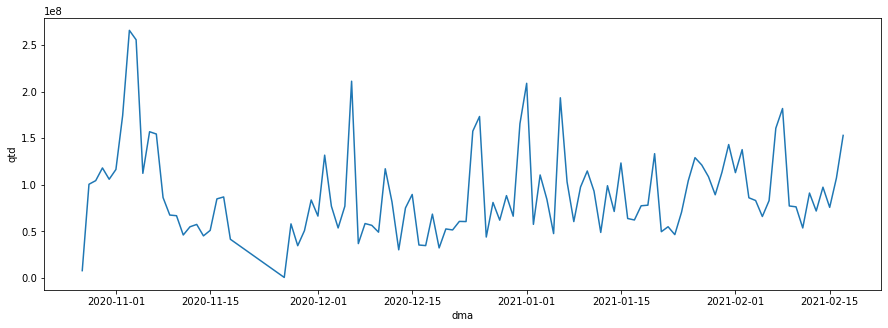

In [364]:
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=diaMes.dma, y=diaMes.qtd, ci=None, ax=ax)

#### Por hashtag por hora por dia da semana

Soma de quantidades usado com mesmo raciocínio do gráfico anterior, de aproximar com a quantidade real

In [365]:
#cálculo do valor total por hash, dia, hora
hashHora = tt_unique_hora.groupby(by=['hashtag','nDiaSemana','diaSemana','hora'], as_index=False).qtd.agg('sum')

In [366]:
hashHora

,hashtag,nDiaSemana,diaSemana,hora,qtd
0,'DYNAMITE',5,Sábado,8,"332,590.00"
1,1 - BOLSONARO,5,Sábado,18,"73,353.18"
2,1 - BOLSONARO,5,Sábado,19,"71,658.08"
3,1 - BOLSONARO,5,Sábado,20,"69,863.42"
4,1 - BOLSONARO,5,Sábado,21,"67,241.83"
...,...,...,...,...,...
78211,형원이란_다정함이_내린_날,3,Quinta-Feira,15,"147,668.00"
78212,호비생일ᄎᄏ,2,Quarta-feira,13,"1,047,058.00"
78213,호비생일ᄎᄏ,2,Quarta-feira,14,"1,096,971.17"
78214,호비생일ᄎᄏ,2,Quarta-feira,15,"1,156,328.00"


### Agrupamentos para visualização

Nos dataframes e gráficos seguintes, as quantidades foram calculadas com médias para que efeitos de outliers fossem diminuidos com o tempo

#### Média por dia da semana

<BarContainer object of 7 artists>

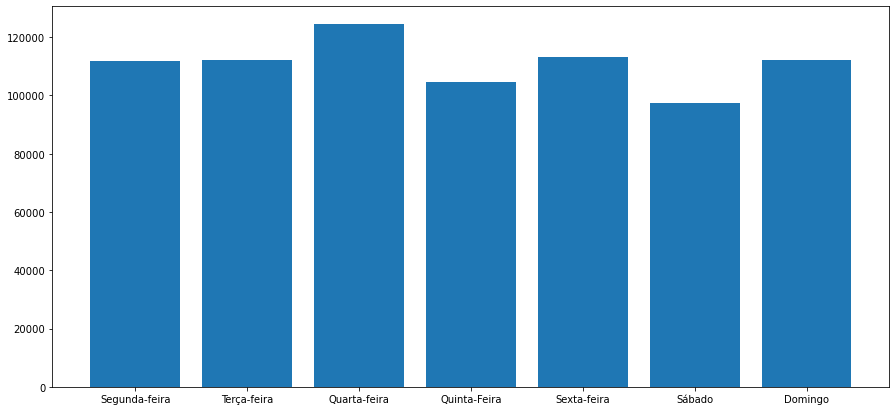

In [367]:
diaQTD = tt_unique_hora.groupby(by=['nDiaSemana'], as_index=False).qtd.agg('mean')
diaQTD['diaSemana'] = diaQTD.apply(lambda row: DIAS[int(row.nDiaSemana)], axis=1)

fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(diaQTD.diaSemana,diaQTD.qtd)

#### Média por hora

<BarContainer object of 24 artists>

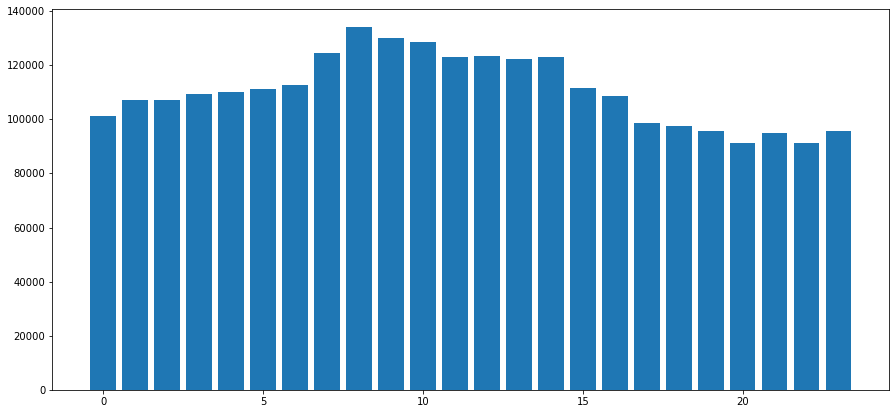

In [368]:
#quantidade por hora
horaQTD = tt_unique_hora.groupby(by=['hora'], as_index=False).qtd.agg('mean')
#horaQTD
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(horaQTD.hora,horaQTD.qtd)

#### Média por hora por dia da semana

In [369]:
#cálculo do valor médio por dia, hora
diaHora = tt_unique_hora.groupby(by=['nDiaSemana','diaSemana','hora'], as_index=False).qtd.agg('mean')
diaHora

,nDiaSemana,diaSemana,hora,qtd
0,0,Segunda-feira,0,"109,280.60"
1,0,Segunda-feira,1,"118,173.65"
2,0,Segunda-feira,2,"118,229.37"
3,0,Segunda-feira,3,"118,057.43"
4,0,Segunda-feira,4,"110,647.99"
...,...,...,...,...
163,6,Domingo,19,"71,718.22"
164,6,Domingo,20,"73,722.02"
165,6,Domingo,21,"79,841.57"
166,6,Domingo,22,"82,627.89"


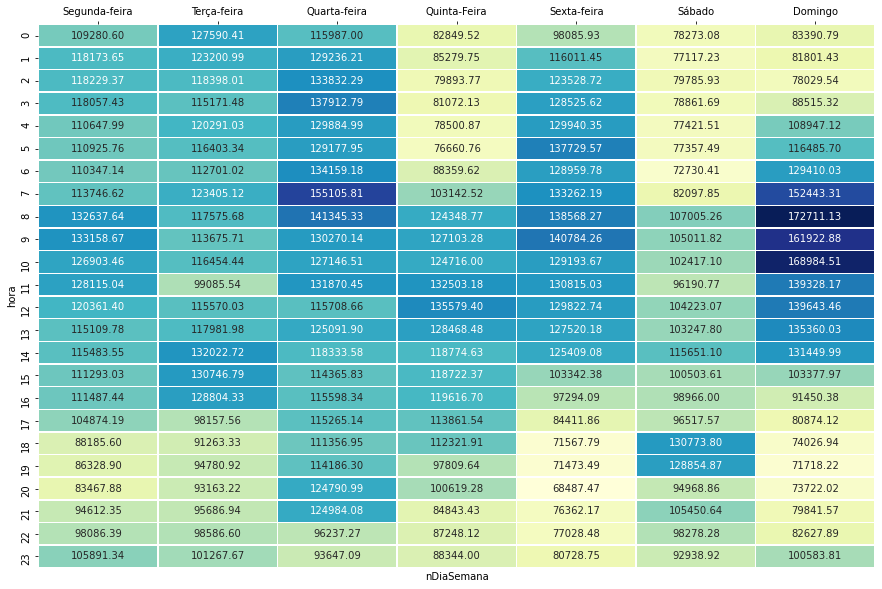

In [370]:
diahoratabela = diaHora[['nDiaSemana','hora','qtd']].pivot(index='hora', columns='nDiaSemana', values='qtd')
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(diahoratabela, cmap='YlGnBu', annot=True, fmt=".2f", vmin=diaHora.qtd.min(), vmax=diaHora.qtd.max(), linewidths=0.5, linecolor='white', cbar=False)

plt.xticks(np.arange(7) + .5, labels=DIAS)
ax.xaxis.tick_top()

plt.show()

In [371]:
diaHora

,nDiaSemana,diaSemana,hora,qtd
0,0,Segunda-feira,0,"109,280.60"
1,0,Segunda-feira,1,"118,173.65"
2,0,Segunda-feira,2,"118,229.37"
3,0,Segunda-feira,3,"118,057.43"
4,0,Segunda-feira,4,"110,647.99"
...,...,...,...,...
163,6,Domingo,19,"71,718.22"
164,6,Domingo,20,"73,722.02"
165,6,Domingo,21,"79,841.57"
166,6,Domingo,22,"82,627.89"


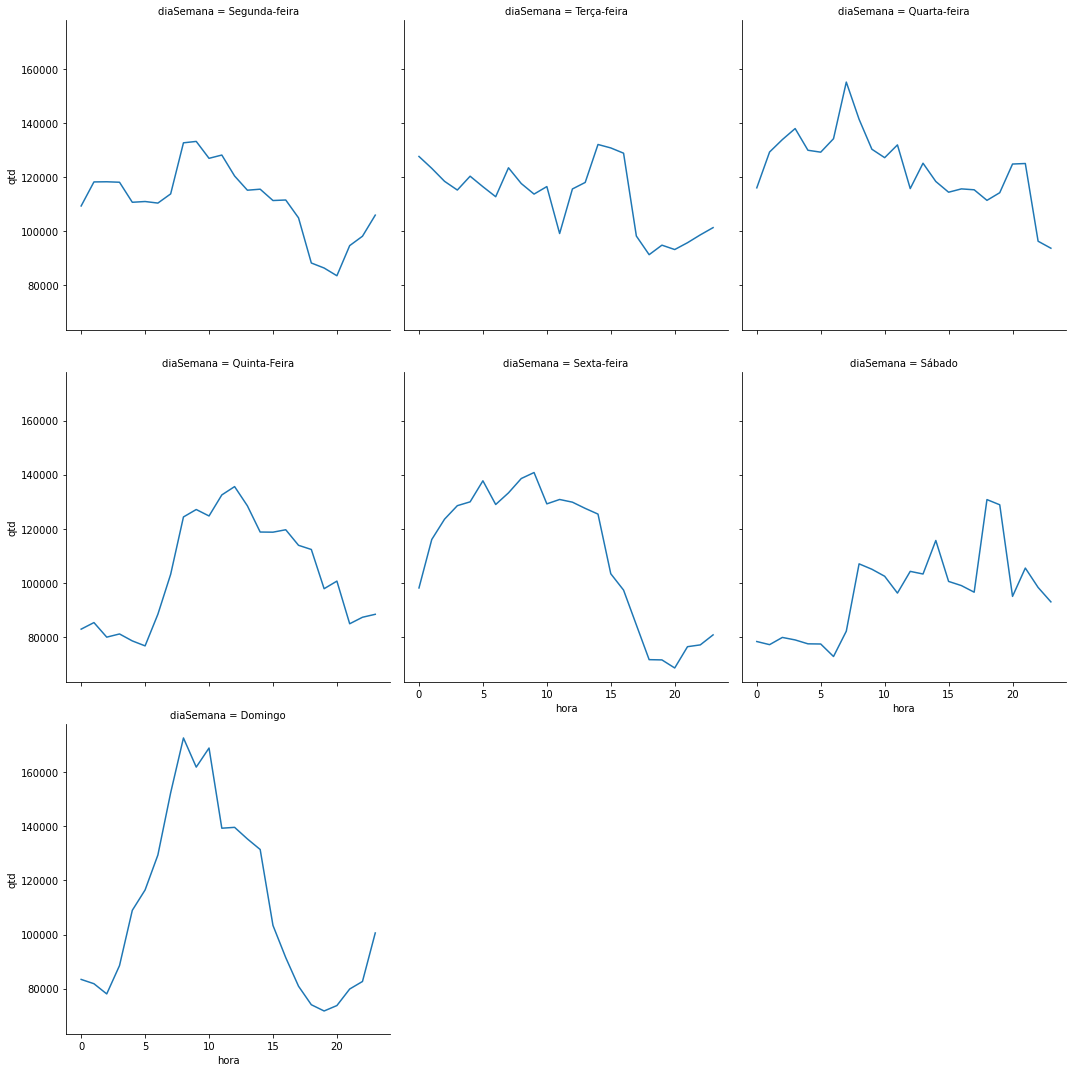

In [372]:
sns.relplot(x='hora',y='qtd',data=diaHora, kind='line', col='diaSemana', col_wrap=3)

### Gravação de arquivo de dado analítico tratado

In [373]:
tt_unique_hora.to_csv('trendsTratados.csv', decimal=',', sep=';', float_format='%.2f')